# 経営情報各論BⅡ


# 7. 分布  8-9, 15

## 正規分布とその応用

### ライブラリのインポート

In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 表示桁数の指定
%precision 3
# グラフをjupyter Notebook内に表示させるための指定
%matplotlib inline

### 実装：確率密度

In [3]:
# 円周率
sp.constants.pi

3.142

In [4]:
# 指数関数
np.exp(1)

2.718281828459045

In [6]:
# 「平均4、分散0.64(標準偏差0.8)の正規分布」における、確率変数が3であるときの確率密度
x = 3
mu = 4
sigma = 0.8

1 / (np.lib.scimath.sqrt(2 * sp.constants.pi * sigma**2)) * np.exp(- ((x - mu)**2) / (2 * sigma**2))

0.22831135673627742

In [7]:
stats.norm.pdf(loc = 4, scale = 0.8, x = 3)

0.2283113567362774

In [8]:
norm_dist = stats.norm(loc = 4, scale = 0.8)
norm_dist.pdf(x = 3)

0.2283113567362774

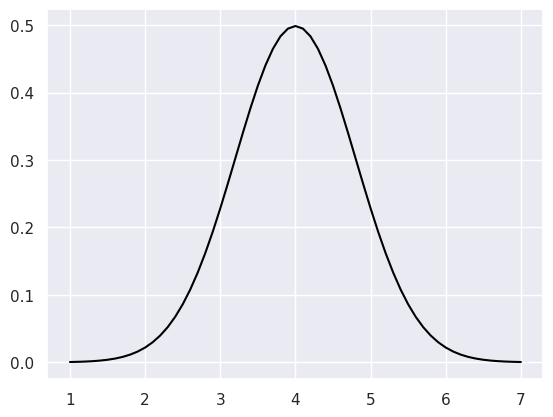

In [9]:
x_plot = np.arange(start = 1, stop = 7.1, step = 0.1)
plt.plot(
    x_plot,
    stats.norm.pdf(x = x_plot, loc = 4, scale = 0.8),
    color = 'black'
)

### 標本がある値以下となる割合

In [10]:
np.random.seed(1)
simulated_sample = stats.norm.rvs(
    loc = 4, scale = 0.8, size = 100000)
simulated_sample

array([5.299, 3.511, 3.577, ..., 4.065, 4.275, 3.402])

In [11]:
np.sum(simulated_sample <= 3)

10371

In [12]:
np.sum(simulated_sample <= 3) / len(simulated_sample)

0.10371

### 実装：累積分布関数

In [13]:
stats.norm.cdf(loc = 4, scale = 0.8, x = 3)

0.10564977366685535

In [14]:
stats.norm.cdf(loc = 4, scale = 0.8, x = 4)

0.5

### 実装：パーセント点(ある確率になる基準値)

In [15]:
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.025)

2.4320288123679563

In [16]:
sitagawa = stats.norm.cdf(loc = 4, scale = 0.8, x = 3)
stats.norm.ppf(loc = 4, scale = 0.8, q = sitagawa)

3.0000000000000004

In [17]:
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.5)

4.0

### t値の標本分布

In [18]:
# 乱数の種
np.random.seed(1)
# t値を格納する入れ物
t_value_array = np.zeros(10000)
# 正規分布クラスのインスタンス
norm_dist = stats.norm(loc = 4, scale = 0.8)
# シミュレーションの実行
for i in range(0, 10000):
    sample = norm_dist.rvs(size = 10)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof = 1)
    sample_se = sample_std / np.lib.scimath.sqrt(len(sample))
    t_value_array[i] = (sample_mean - 4) / sample_se

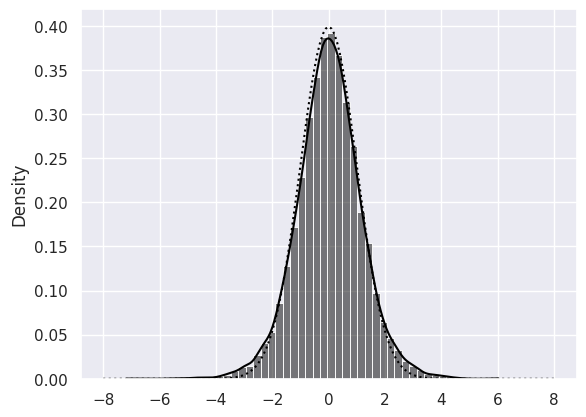

In [19]:
# 標準化された標本平均のヒストグラム
sns.histplot(t_value_array, color = 'black',stat="density",kde=True, bins=50)

# 標準正規分布の確率密度
x = np.arange(start = -8, stop = 8.1, step = 0.1)
plt.plot(x, stats.norm.pdf(x = x),
         color = 'black', linestyle = 'dotted')

### 実装：t分布

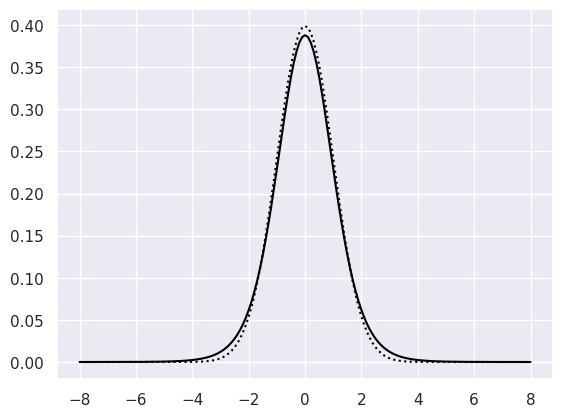

In [20]:
plt.plot(x, stats.norm.pdf(x = x),
         color = 'black', linestyle = 'dotted')
plt.plot(x, stats.t.pdf(x = x, df = 9),
         color = 'black')

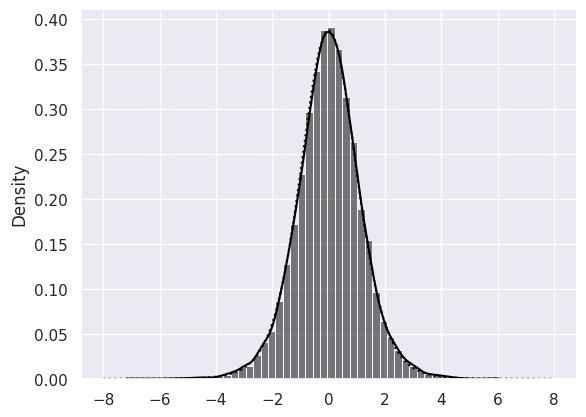

In [21]:
sns.histplot(t_value_array,
             color = 'black',stat="density",kde=True , bins=50)
plt.plot(x, stats.t.pdf(x = x, df = 9),
         color = 'black', linestyle = 'dotted')